<a href="https://colab.research.google.com/github/thinhngo-x/Data-Science/blob/master/Convex_optimization_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
eps = 1e-5
n = 100
d = 20
lda = 10
y = np.random.rand(n)
X = np.random.rand(n, d)
b = np.ones(d) * lda
v0 = np.zeros(n)

In [3]:
def hessian_f(Q, A, b, t, v):
  n = A.shape[0]
  hessian = 2*t*Q
  tmp = A.T / (b - A @ v)[None, :]
  hessian += tmp @ tmp.T
  return hessian

def grad_f(Q, p, A, b, t, v):
  grad = 2*t*Q @ v + t*p
  grad += (A / (b - A @ v)[:, None]).sum(axis=0)
  return grad

def f(Q, p, A, b, t, v):
  return t*v @ (Q @ v) + t*p @ v - np.log(b - A @ v).sum()


def centering_step(Q, p, A, b, t, v0, eps):
  v = []
  while True:
    v.append(v0)
    hessian = hessian_f(Q, A, b, t, v0)
    inv_hessian = np.linalg.inv(hessian)
    grad = grad_f(Q, p, A, b, t, v0)
    d_x = - inv_hessian @ grad
    lambda_sq = grad @ (inv_hessian @ grad)
    if lambda_sq/2 <= eps:
      break
    # Backtracking line search
    s = 1.
    alpha = 0.25
    beta = 0.7
    f_ = lambda x: f(Q, p, A, b, t, x)
    # if (b - A @ (v0 + s*d_x) > 0).all() and (b - A @ v0 > 0).all():
    while True:
      if (b - A @ (v0 + s*d_x) > 0).all() and (f_(v0 + s*d_x) < f_(v0) + alpha * s * grad @ d_x):
        break
      s *= beta
    v0 = v0 + s * d_x

  return v

def barr_method(Q, p, A, b, v0, eps, t=1., mu=15.):
  m = A.shape[0]
  vs = [v0]
  while True:
    v = centering_step(Q, p, A, b, t, v0, eps)
    vs += v[1:]
    v0 = v[-1]
    if m/t < eps:
      break
    t *= mu
  return vs

mu = 2 f_ast = -14.160886308142
mu = 10 f_ast = -14.160886308147
mu = 15 f_ast = -14.160886308147
mu = 30 f_ast = -14.160886308147
mu = 60 f_ast = -14.160886308147
mu = 100 f_ast = -14.160886308147
mu = 150 f_ast = -14.160886308146


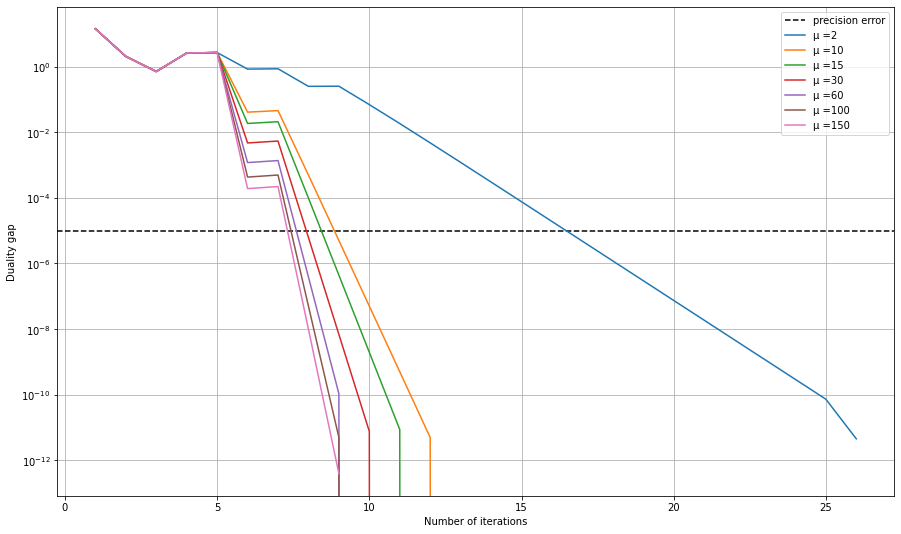

In [6]:
import matplotlib.pyplot as plt

def objective(Q, p, A, b, v):
  return v @ (Q @ v) + p @ v

fig, ax = plt.subplots(figsize=(15, 9))
ax.grid(True, which="both")
ax.axhline(y=eps, color = 'r', linestyle = '--', label="precision error", c='black')

v = barr_method(np.eye(n)/2, y, X.T, b, v0, 1e-5, mu=10)
f_ast = objective(np.eye(n)/2, y, X.T, b, v[-1])

for mu in [2, 10, 15, 30, 60, 100, 150]:
  v = barr_method(np.eye(n)/2, y, X.T, b, v0, 1e-5, mu=mu)
  print("mu = %d f_ast = %.12f" % (mu, objective(np.eye(n)/2, y, X.T, b, v[-1])))
  ax.plot(np.arange(len(v))+1, [objective(np.eye(n)/2, y, X.T, b, elt) - f_ast for elt in v], label='µ ='+str(mu))
ax.semilogy()
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Duality gap')
plt.legend()
plt.show()

With $\mu$ increasing, the number of iterations for the solution to reach the same precision error is decreasing. The optimal value computed is not however affected by the value of $\mu$.

From the graph, we can say that from $\mu = 60$, the convergence rate does not change much when we increase $\mu$, around 10 iterations. Thus, we can choose whichever $\mu > 60$ to quickly obtain the optimal value.